#                                        Fake -News Detection Project

# Problem statement:
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 
In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains a CSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset, evaluate their performance, and finally report the best model you got on the data and its performance.


# Data- Description:

There are 6 columns in the dataset provided to you. The description of each of the column is given below:

“id”:  Unique id of each news article

“headline”:  It is the title of the news.

“news”:  It contains the full text of the news article

“Unnamed:0”:  It is a serial number

“written_by”:  It represents the author of the news article

“label”:  It tells whether the news is fake (1) or not fake (0).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('train_news.csv')

In [3]:
data.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
data.shape

(20800, 6)

In [5]:
data.drop(data.columns[0], axis=1, inplace=True)

In [6]:
data.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [7]:
len(data['written_by'].unique())

4202

There are 4202 writers in the dataset.

In [8]:
data.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

From above distribution , it is concluded that we have a balanced dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id            20800 non-null int64
headline      20242 non-null object
written_by    18843 non-null object
news          20761 non-null object
label         20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


There are 2 and 3 feature which belongs to int and categorical respectively

In [10]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


# Null/Missing Value Analysis

In [11]:
data.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

There are 558, 1957,39 values are null/Missing from the feature headline,written_by,news respectively

In [12]:
data['news'] = data['news'].replace(np.nan,'', regex=True)

In [13]:
data['headline'] = data['headline'].replace(np.nan,'', regex=True)

As we know Nan+ something will result in Nan , therefore Replacing Nan with space in  News , headlines feature so that we can be able to combine these two feature .

# Joining the headlines and news feature  for easy analysis

In [14]:
data['news']=data['headline'] + ' ' + data['news']

In [15]:
data.isnull().sum()

id               0
headline         0
written_by    1957
news             0
label            0
dtype: int64

Now our News features is like full article with headlines and news in it

In [16]:
data['length'] = data['news'].apply(len)
data.head()

,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,Ethics Questions Dogged Agriculture Nominee as...,0,8021
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,0,6185
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,Cotton to House: ’Do Not Walk the Plank and Vo...,0,526
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"Paul LePage, Besieged Maine Governor, Sends Co...",0,6617
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,A Digital 9/11 If Trump Wins Finian Cunningh...,1,9193


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B36A2CCC0>,
      dtype=object)

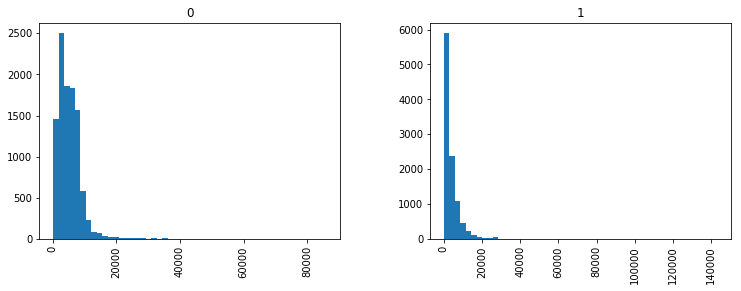

In [17]:
data.hist(column='length', by='label', bins=50,figsize=(12,4))

The count of  of fake news of length < 20k is more , which means the fake news article generally tries to be short ,as the frequency is very high at about 6000 for the fake news shown in above figure

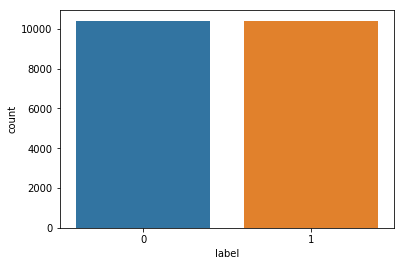

In [18]:
import seaborn as sns
sns.countplot(x="label", data=data)

The count plot shows that our dataset is balanced.

# Preprocessing News

In the Preprocessing phase we do the following in the order below:-

a) Begin by removing the html tags

b) Remove any punctuations or limited set of special characters like , or . or # etc.

c) Check if the word is made up of english letters and is not alpha-numeric

d) Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

e) Convert the word to lowercase

f) Remove Stopwords

In [19]:
# printing some Messages
messg = data['news'].values[0]
print(messg)
print('='*50)

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run h

In [20]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(messg, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run h

In [21]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [22]:
messg_0 = decontracted(messg)
print(messg_0)
print("="*50)

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in 2003  —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April 2003. “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run h

In [23]:
#remove words with numbers 
messg_0 = re.sub("\S*\d\S*", "", messg_0).strip()
print(messg_0)

Ethics Questions Dogged Agriculture Nominee as Georgia Governor - The New York Times WASHINGTON  —   In Sonny Perdue’s telling, Georgians were growing weary of the corruption and scandals in their state when he took over as governor in   —   a time when he gave his own version of a “drain the swamp” pledge. “My first goal as governor is to restore public trust in state government by changing the culture of state government,” Mr. Perdue told a leadership conference at Kennesaw State University in April  “Our form of government depends on a mutual bond of trust between the people and their government. But people have become cynical about their government. ” But Mr. Perdue, a Republican who is awaiting confirmation to serve as President Trump’s agriculture secretary, became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor. The criticism centers on the fact that, as Mr. Trump has, he continued to own or help run his family

In [24]:
#remove spacial character
messg_0 = re.sub('[^A-Za-z0-9]+', ' ', messg_0)
print(messg_0)

Ethics Questions Dogged Agriculture Nominee as Georgia Governor The New York Times WASHINGTON In Sonny Perdue s telling Georgians were growing weary of the corruption and scandals in their state when he took over as governor in a time when he gave his own version of a drain the swamp pledge My first goal as governor is to restore public trust in state government by changing the culture of state government Mr Perdue told a leadership conference at Kennesaw State University in April Our form of government depends on a mutual bond of trust between the people and their government But people have become cynical about their government But Mr Perdue a Republican who is awaiting confirmation to serve as President Trump s agriculture secretary became a target of frequent criticism that he was failing to honor his own ethics pledge during his eight years as governor The criticism centers on the fact that as Mr Trump has he continued to own or help run his family business ventures four companies 

In [25]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [26]:
# Combining all 
from tqdm import tqdm
preprocessed_news = []
# tqdm is for printing the status bar
for sentance in tqdm(data['news'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_news.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20800/20800 [00:38<00:00, 542.00it/s]


In [27]:
#Printing a sample news after the preprocessing and cleaning of the text.
preprocessed_news[500]

'progressive nomad renewed hope protesters wild buffalo storm horizon video progressive nomad renewed hope protesters wild buffalo storm horizon video stephanie kuklish peaceful protest prayer thursday police armed weapons shot rubber bullets bean bags crowd native american water protectors fighting dakota access pipeline awe hundreds bison appeared showing warriors fighting native americans arrested peaceful prayer bombarded state local police dressed riot gear using violent tactics unarmed warriors though showing bison stop corrupt police attacks bring renewed sense purpose tired motivated crowd bison potent symbol native american heritage blog post incident davidica littlespottedhorse explained legend bison stating great bison buffalo north america powerful symbol american indians though best suited cooler climates bison roamed virtually entire continent smaller woodlands bison bigger cousin plains bison revered honored ceremony everyday life plains indian bison brother meant sacred

In [28]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
final_preprocessed_news=[]
for i in preprocessed_news:
    lemma_message=lemma.lemmatize(i,pos='v')
    final_preprocessed_news.append(lemma_message)
final_preprocessed_news[500]

'progressive nomad renewed hope protesters wild buffalo storm horizon video progressive nomad renewed hope protesters wild buffalo storm horizon video stephanie kuklish peaceful protest prayer thursday police armed weapons shot rubber bullets bean bags crowd native american water protectors fighting dakota access pipeline awe hundreds bison appeared showing warriors fighting native americans arrested peaceful prayer bombarded state local police dressed riot gear using violent tactics unarmed warriors though showing bison stop corrupt police attacks bring renewed sense purpose tired motivated crowd bison potent symbol native american heritage blog post incident davidica littlespottedhorse explained legend bison stating great bison buffalo north america powerful symbol american indians though best suited cooler climates bison roamed virtually entire continent smaller woodlands bison bigger cousin plains bison revered honored ceremony everyday life plains indian bison brother meant sacred

Building a model using variuos classification models by featurizing the final_preprocessed_news in TFIDF . This activity would inculde hyper parameter tuning , computation of AUC , confusion matrix , classification report and at last best model will be selected

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
#######################################################################################################
Y = data['label'].values  # taken  label of the final data set after preprocessing
X = np.array(final_preprocessed_news)# converted into numpy array as shape cannot be obtained on list
 

In [30]:
dict={'Label':Y , 'News' :X }

In [31]:
df=pd.DataFrame(dict)

In [32]:
data.shape

(20800, 6)

In [33]:
df_train=df.iloc[:20000,:]
df_test=df.iloc[20000:,:]

# Train Test Split

In [36]:
#SPLITTING THE DATA SET INTO TRAIN ,TEST DATA
#Note:-Here in order to prevent the data leakage I have splitted the data in train , test repectively before transforming into Bow
X_train, X_test, y_train, y_test = train_test_split(df_train['News'] ,df_train['Label'], test_size=0.33) # this is random splitting
#Checking the shape of each data set
print("Checking the shape of each data set")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("-"*50)

Checking the shape of each data set
(13400,) (13400,)
(6600,) (6600,)
--------------------------------------------------


# Featurization in TFIDF

In [37]:
#Vectorizing using tfidf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(X_train)
X_train_tfidf = tf_idf_vect.transform(X_train)
X_test_tfidf = tf_idf_vect.transform(X_test)
##########################################################################################################
#Checking the shape after Vectorization using tfidf
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)# converted the text into numerical vector in the form of tfidf for the TRAIN data
print(X_test_tfidf.shape, y_test.shape)# converted the text into numerical vector in the form of tfidf for the TEST data
print("="*100)

After vectorizations
(13400, 118388) (13400,)
(6600, 118388) (6600,)


# Importing all the required libraries for modelling

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Defining function to print the accuracy of the Model

In [39]:
def accuracy_of_model(model,X_train_tfidf,y_train,X_test_tfidf,y_test):
    model.fit(X_train_tfidf,y_train)
    pred = model.predict(X_test_tfidf)
    print('The accuracy  is {}'.format(accuracy_score(y_test,pred)))
    #return accuracy_score(test_y,pred)
    

# Defining function to plot the train , test AUC and print the confusion matrix.

In [40]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model):
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(y_train,model.predict_proba(X_train_tfidf)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test_tfidf)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(X_test_tfidf)
    sns.heatmap(confusion_matrix(y_test,pred),annot=True)
    print(confusion_matrix(y_test,pred))

# Performing various classification models
Note :- The performance of the models will compared at the end with the help of Pretty table

# 1.DecisionTreeClassifier

In [41]:
#max_depth = np.arange(30)
parameter={'max_depth':[1, 5, 10, 50, 100, 500, 1000],'min_samples_split':[5, 10,50, 100, 500,1000]}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,parameter,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'max_depth': 10, 'min_samples_split': 10}

In [42]:
DT=DecisionTreeClassifier(max_depth=10,min_samples_split=10)
accuracy=accuracy_of_model(DT,X_train_tfidf,y_train,X_test_tfidf,y_test)


The accuracy  is 0.9457575757575758


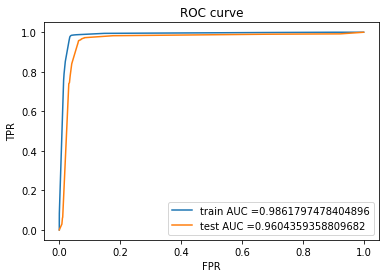

[[3068  230]
 [ 128 3174]]


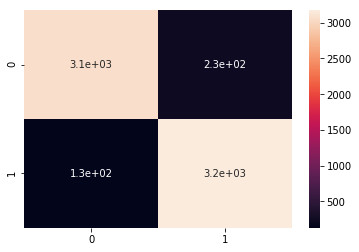

In [43]:
roc_curve(DT)

In [47]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(DT,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(DT,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9496238717547406
mean cross_val_score_AUC_SCORE_for_test 0.9388495808683579


# 2.Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
parameter={'alpha': [0.000001,0.00001,0.0001,0.001,0.01,1,10,100,1000,10000,100000]}
NB=MultinomialNB()
gs=GridSearchCV(NB,parameter,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'alpha': 0.01}

In [45]:
NB=MultinomialNB(alpha=0.01)
accuracy=accuracy_of_model(NB,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9140909090909091


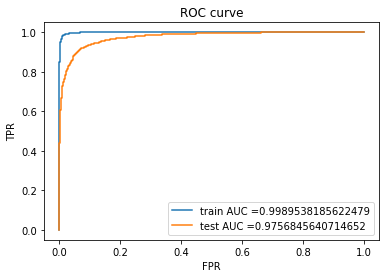

[[3150  148]
 [ 419 2883]]


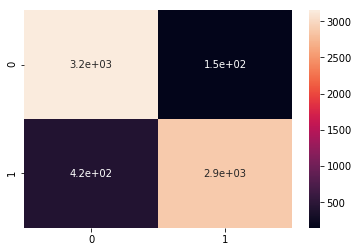

In [46]:
roc_curve(NB)

In [48]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(NB,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(NB,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.97520534317392
mean cross_val_score_AUC_SCORE_for_test 0.9694159522503437


# 3.Logistic Regression

In [49]:
param={'C':[10**-4, 10**-2, 10**0, 10**2, 10**4],'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,param,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'C': 10000, 'penalty': 'l2'}

In [50]:
log=LogisticRegression(C=10000,penalty='l2')
accuracy=accuracy_of_model(log,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9645454545454546


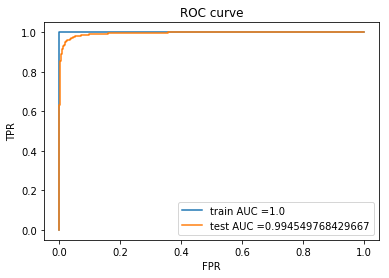

[[3175  123]
 [ 111 3191]]


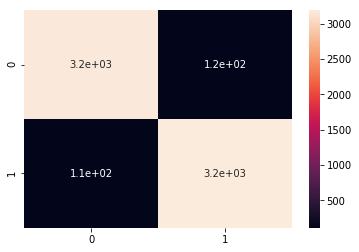

In [51]:
roc_curve(log)

In [52]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(log,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(log,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.993463230888592
mean cross_val_score_AUC_SCORE_for_test 0.9909352543750638


# 4.RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[10,50,100,500,1000],'max_depth':[1, 5, 10, 50, 100, 500, 1000]}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=5)
gs.fit(X_train_tfidf,y_train)
gs.best_params_

{'max_depth': 1000, 'n_estimators': 1000}

In [54]:
RF=RandomForestClassifier(n_estimators=1000,max_depth=1000)
accuracy=accuracy_of_model(RF,X_train_tfidf,y_train,X_test_tfidf,y_test)

The accuracy  is 0.9463636363636364


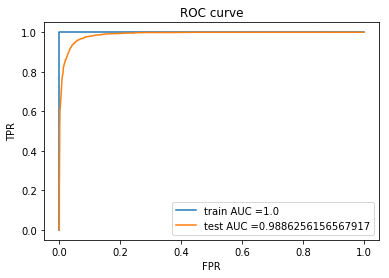

[[3158  140]
 [ 214 3088]]


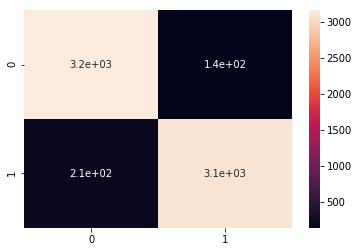

In [55]:
roc_curve(RF)

In [56]:
print('mean cross_val_score_AUC_SCORE_for_train',cross_val_score(RF,X_train_tfidf,y_train,scoring='roc_auc', cv=5).mean())
print('mean cross_val_score_AUC_SCORE_for_test',cross_val_score(RF,X_test_tfidf,y_test,scoring='roc_auc', cv=5).mean())

mean cross_val_score_AUC_SCORE_for_train 0.9875684219650367
mean cross_val_score_AUC_SCORE_for_test 0.9844632557775466


In [57]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Accuracy", "CV-Train AUC", 'CV-Test AUC']
x.add_row(["TFIDF","Decision Tree",0.94,0.98,0.96])
x.add_row(["TFIDF","Naive Bayes",0.91,0.99,0.97])
x.add_row(["TFIDF","Logistic Regression",0.96,1.0,0.99])
x.add_row(["TFIDF","RandomForest",0.94,1.0,0.99])

print(x)

+------------+---------------------+----------+--------------+-------------+
| Vectorizer |        Model        | Accuracy | CV-Train AUC | CV-Test AUC |
+------------+---------------------+----------+--------------+-------------+
|   TFIDF    |    Decision Tree    |   0.94   |     0.98     |     0.96    |
|   TFIDF    |     Naive Bayes     |   0.91   |     0.99     |     0.97    |
|   TFIDF    | Logistic Regression |   0.96   |     1.0      |     0.99    |
|   TFIDF    |     RandomForest    |   0.94   |     1.0      |     0.99    |
+------------+---------------------+----------+--------------+-------------+


# BEST MODEL - Logistic Regression

Now in the next phase of our model , we will be predicting the label (positive/negative) of the email using best model on the test data and at last we will be printing some words that are contributing to positive response and negative label respectively

In [63]:
df_test=df.iloc[20000:,:]

In [61]:
#Vectorizing using tfidf
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
tf_idf_vect.fit(df_test['News'])
UNSEEN_tfidf = tf_idf_vect.transform(df_test['News'])


In [62]:
log=LogisticRegression(C=10000,penalty='l2')

In [67]:
log.fit(UNSEEN_tfidf,df_test['Label'])
pred = log.predict(UNSEEN_tfidf)
print('Accuracy',accuracy_score(df_test['Label'],pred))


Accuracy 1.0


In [72]:
print('classification Report \n',classification_report(df_test['Label'],pred))

classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [73]:
dict1={'Predicted label':pred , 'Actual Label':df_test['Label']}

In [74]:
df=pd.DataFrame(dict1)

In [75]:
df

,Predicted label,Actual Label
20000,1,1
20001,1,1
20002,1,1
20003,1,1
20004,0,0
...,...,...
20795,1,1
20796,1,1
20797,1,1
20798,0,0
